ch4. 6~7, 10 pg. 227~251, 278~289

## 06 XGBoost(eXtra Gradient Boost)

### XGBoost 개요

- tree기반의 앙상블 학습에서 가장 각광받는 알고리즘. 캐글 경연 대회에서 상위를 차지한 많은 데이터 과학자가 XGBoost를 이용

- **뛰어난 예측 성능**: 일반적으로 분류와 회귀 영역에서 뛰어난 예측 성능을 발휘함.

- **GBM 대비 빠른 수행 시간**: 일반적인 GBM은 순차적으로 Weak learner가 가중치를 증감하는 방법으로 학습하기 때문에 전반적으로 속도가 느림. 하지만 XGBoost는 병렬 수행 및 다양한 기능으로 GBM에 비해 빠른 수행 성능을 보장함. 아쉽게도 XGBoost가 일반적인 GBM에 비해 수행 시간이 빠르다는 것이지, 다른 머신러닝 알고리즘(ex. 랜덤 포레스트)에 비해서는 빠르다는 의미는 아님.

- **과적합 규제(Regularization)**: 표준 GBM의 경우 과적합 규제 기능이 없으나 XGBoost는 자체에 과적합 규제 기능으로 과적합에 좀 더 강한 내구성을 가질 수 있음.

- **Tree pruning (나무 가지치기)**: 일반적으로 GBM은 분할 시 부정 손실이 발생하면 분할을 더 이상 수행하지 않지만, 이러한 방식도 자칫 지나치게 많은 분할을 발생할 수 있습니다. 다른 GBM과 마찬가지로 XGBoost도 max_depth 파라미터로 분할 깊이를 조정하기도 하지만, tree pruning으로 더 이상 긍정 이득이 없는 분할을 가지치기 해서 분할 수를 더 줄이는 추가적인 장점을 가지고 있습니다. 

- **자체 내장된 교차 검증**: XGBoost는 반복 수행 시마다 내부적으로 학습 데이터 세트와 평가 데이터 세트에 대한 교차 검증을 수행해 최적화된 반복 수행 횟수를 가질 수 있습니다. 지정된 반복 횟수가 아니라 교차 검증을 통해 평가 데이터 세트의 평가 값이 최적화되면 반복을 중간에 멈출 수 있는 조기 중단 기능이 있음.

- **결손값 자체 처리**: XGBoost는 결손값을 자체 처리할 수 있는 기능을 가짐.

파이썬 래퍼 XGBoost 모듈: 초기의 독자적인 XGBoost 프레임워크 기반의 XGBoost

사이킷런 래퍼 XGBoost 모듈: 사이킷런과 연동되는 모듈, 사이킷런 estimator가 학습을 위해 사용하는 fit()과 predict() 사용 가능

### 파이썬 래퍼 XGBoost 하이퍼 파라미터

**일반 파라미터**: 일반적으로 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터로서 디폴트 파라미터 값을 바꾸는 경우는 거의 없음.

- booster: gbtree(tree based model / default) 또는 gblinear(linear model)) 선택

- silent: default는 0이고 출력 메시지를 나타내고 싶지 않을 경우 1로 설정

- nthread: CPU의 실행 스레드 개수를 조정하며, default는 CPU의 전체 스레드를 다 사용하는 것. 멀티 코어/스레드 CPU 시스템에서 전체 CPU를 사용하지 않고 일부 CPU만을 사용해 ML애플리케이션을 구동하는 경우에 변경함.

**부스트 파라미터**: 트리 최적화, 부스팅, regularization 등과 관련 파라미터 등을 지칭함. 대부분이 속함.

- eta (deault=0.3, alias=learning_rate): GBM의 학습률과 같은 파라미터. 0과 1사이의 값을 지정하며 부스트 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값. (파이썬 래퍼 기반의 XGBoost를 이용할 경우 default는 0.3, 사이킷런 래퍼 클래스를 이용할 경우 eta는 learning_rate 파라미터로 대체되며 default는 0.1. 보통은 0.01~0.2 값을 선호

- num_boost_rounds: GBM의 n_estimators와 같은 파라미터

- min_child_weight(default=1): 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 weight 총합. min_child_weight가 클수록 분할을 자제함. 과적합을 조절하기 위해 사용

- gamma(default=0, alias: min_simple_loss): 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값입니다. 해당 값보다 큰 손실이 감소된 경우에 리프 노드를 분리합니다. 값이 클수록 과적합 감소 효과가 있습니다. 

- max_depth(default=6): 0을 지정하면 깊이에 제한이 없음. max_depth가 높으면 특정 피처 조건에 특화되어 룰 조건이 만들어지므로 과적합 가능성이 높아지며 보통 3~10 값을 적용

- sub_sample(default=1): 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율을 지정. sub_sample=0.5로 지정 시, 전체 데이터의 절반을 트리를 생성하는데 사용. 일반적으로 0.5~1 사이의 값 사용

- colsample_bytree(default=1): GBM의 max_features. 트리 생성에 필요한 피처를 임의로 샘플링하는데 사용. 매우 많은 피처가 있는 경우 과적합을 조정하는데 적용.

- lambda(default=1, alias: reg_lambda): L2 Regularization 적용 값. 피처 개수가 많을 수록 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음.

- alpha(default=0, alias: reg_alpha): L1 Regularization 적용 값. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음.

- scale_pos_weight(default=1): 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터

       

**학습 태스크 파라미터**: 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터

- objective: 초소값을 가져야할 손실 함수를 정의. 주로 사용되는 손실 함수는 이진 분류인지 다진 분류인지에 따라 달라짐.

- binary:logistic: 이진 분류일 때 적용

- multi:softmax: 다중 분류일 떄 적용. 손실함수가 multi:softmax:이면 num_class(레이블 클래스 개수)를 지정해야 함.

- multi:softprob: 개별 레이블 클래스에 해당되는 예측 확률을 반환

- eval_metric: 검증에 사용되는 함수. default는 회귀인 경우 rmse, 분류일 경우 error

  - rmse: root mean square error

  - mae: mean absolute error

  - logloss: negative log-likelihood

  - error: binary classification error rate (0.5 threshold)

  - merror: multiclass classification error rate

  - mlogloss: multiclass logloss

  - auc: area under the curve



과적합 문제가 심각하다면 적용할 것 

- eta 값을 낮춤(0.01~0.1). eta값을 낮출 경우 num_round(n_estimators)는 반대로 높여줘야 함.

- max_depth값을 낮춤

- min_child_weight 값을 높임

- gamma 값을 높임. 

- subsample과 colsample_bytree를 조정하는 것도 트리가 너무 복잡하게 생성되는 것을 막음.

In [ ]:
import xgboost
print(xgboost.__version__)

0.90


### 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

종양의 크기, 모양 등의 속성을 바탕으로 악성(0) 종양인지 양성(1) 종양인지 구분

In [1]:
import xgboost as xgb
from xgboost import plot_importance # 피처의 중요도를 시각화해주는 모듈
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset=load_breast_cancer()
X_features = dataset.data
y_label = dataset.target
cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [2]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [3]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features,y_label, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


파이썬 래퍼 XGBoost는 학습용과 테스트용 데이터 세트를 위해 DMatrix 생성. DMatrix는 주로 넘파이 입력 파라미터를 받아서 만들어지는 XGBoost만의 전용 데이터 세트

In [4]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [5]:
# 하이퍼 파라미터 설정
params = {'max_depth':3,    # 트리 최대 깊이:3
          'eta':0.1,        # 학습률은 0.1
          'objective':'binary:logistic', # 예제 데이터가 0 또는 1 이진 분류이므로 목적함수는 이진 로지스틱
          'eval_metric':'logloss',      # 오류 함수의 평가 성능 지표는 logloss
          'early_stoppings':100}        
num_rounds = 400  # 부스팅 반복횟수는 400회

XGBoost는 수행 성능을 개선하기 위해 더 이상 지표 개선이 없을 경우에 num_boost_round 횟수를 모두 채우지 않고 중간에 빠져 나올 수 있도록 조기 중단 기능 제공

- early_stopping_rounds: 조기 중단 기능. train()함수에 입력

- eval_set: 성능 평가를 수행할 평가용 데이터 세트 설정

- eval_metric: 평가 세트에 적용할 성능 평가 방법. 분류일 경우 주로 'error'(분류 오류), 'logloss'를 적용

In [6]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기함.
wlist = [(dtrain, 'train'), (dtest, 'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round = num_rounds, early_stopping_rounds=100, evals=wlist)

# train()으로 학습을 수행하면 반복 시 train-error와 eval-logloss가 지속적으로 감소

[0]	train-logloss:0.609688	eval-logloss:0.61352
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.540803	eval-logloss:0.547843
[2]	train-logloss:0.483753	eval-logloss:0.494248
[3]	train-logloss:0.434457	eval-logloss:0.447986
[4]	train-logloss:0.39055	eval-logloss:0.409109
[5]	train-logloss:0.354146	eval-logloss:0.374977
[6]	train-logloss:0.321222	eval-logloss:0.345714
[7]	train-logloss:0.292593	eval-logloss:0.320529
[8]	train-logloss:0.267467	eval-logloss:0.29721
[9]	train-logloss:0.245153	eval-logloss:0.277991
[10]	train-logloss:0.225694	eval-logloss:0.260302
[11]	train-logloss:0.207938	eval-logloss:0.246037
[12]	train-logloss:0.192184	eval-logloss:0.231556
[13]	train-logloss:0.177916	eval-logloss:0.22005
[14]	train-logloss:0.165222	eval-logloss:0.208572
[15]	train-logloss:0.153622	eval-logloss:0.199993
[16]	train-logloss:0.14333	eval-logloss:0.190118
[17]	train-logl

In [7]:
pred_probs = xgb_model.predict(dtest) # xgboost의 predict()는 예측 결과 클래스 값이 안리ㅏ 예측 결과를 추정할 수 있는 확률 값을 반환
print('predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:',preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None): # 평가 한번에 호출하는 함수
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)

  #ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)

  print('오차행렬')
  print(confusion)
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [9]:
get_clf_eval(y_test, preds, pred_probs)

오차행렬
[[35  2]
 [ 1 76]]
정확도 : 0.9737, 정밀도 : 0.9744, 재현율:0.9870, F1 : 0.9806, AUC : 0.9951


XGBoost 패키지는 plot_importance()를 이용해 피처 중요도를 시각화 가능

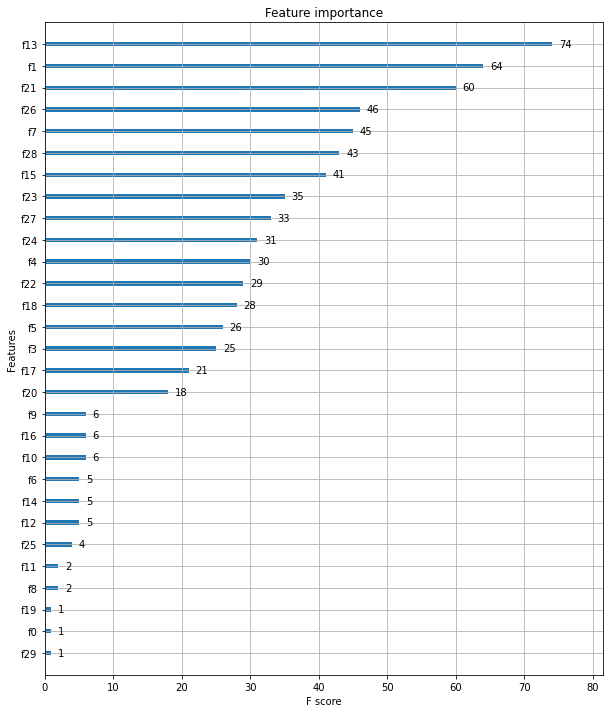

In [10]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax) 
# 피처 순서별로 f자 뒤에 순서를 붙여서 X축에 피처들을 나열 (f0은 첫 번째 피처)

In [12]:
# 파이썬 래퍼 XGBoost의 데이터 세트에 대한 교차 검증 수행 후 최적 파라미터를 구할 수 있는 방법
import xgboost
xgboost.cv(params, # 부스터 파라미터 
           dtrain, # 학습 데이터
           num_boost_round=10, # 부스팅 반복 횟수 
           nfold=3, # CV 폴드 개수
           stratified=False, # CV 수행 시 층화 표본 추출(stratified samjpling) 수행 여부
           folds=None, metrics=(), # CV 수행 시 모니처링할 성능 평가 지표
           obj=None, feval=None, maximize=False, early_stopping_rounds=None, # 조기 중단을 활성화시킴. 반복 횟수 지정
           fpreproc=None, as_pandas=True, verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True )

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.610037,0.000064,0.617447,0.004961
1,0.541817,0.000202,0.555140,0.008989
2,0.483717,0.000955,0.503529,0.012238
3,0.434676,0.001311,0.459869,0.015795
4,0.392310,0.001686,0.423058,0.016788
5,0.355129,0.001390,0.391187,0.019785
6,0.322530,0.001908,0.361119,0.019378
7,0.294159,0.001618,0.337140,0.021086
8,0.269083,0.002068,0.314903,0.019972
9,0.246208,0.001940,0.295012,0.019237


### 사이킷런 래퍼 XGBoost의 개요 및 적용

기존의 xgboost 모듈에서 사용하던 네이티브 하이퍼 파라미터 몇 개를 사이킷런에서 사용하는 하이퍼 파라미터와 호환성 유지를 위해 변경

- eta -> learning_rate

- sub_sample -> subsample

- lambda -> reg_lambda

- alph -> reg_alpha

In [13]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier import
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [16]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차행렬
[[35  2]
 [ 1 76]]
정확도 : 0.9737, 정밀도 : 0.9744, 재현율:0.9870, F1 : 0.9806, AUC : 0.9951


In [19]:
from xgboost import XGBClassifier

wgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals=[(X_test, y_test)]
wgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, # 평가 지표가 향상될 수 있는 반복 횟수
                eval_metric='logloss', # 조기 중단을 위한 평가 지표
                eval_set=evals, verbose=True) # 성능 평가를 수행할 데이터 세트
ws100_preds = wgb_wrapper.predict(X_test)
ws100_preds_proba = wgb_wrapper.predict_proba(X_test)[:,1] 

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

In [21]:
# 조기 중단이 적용되었을 떄, 예측 성능 살펴보기
get_clf_eval(y_test, ws100_preds, ws100_preds_proba)
# 조기 중단이 적용되지 않은 결과보다 약간 저조한 성능을 나타내지만, 큰 차이는 나지 않음.

오차행렬
[[34  3]
 [ 1 76]]
정확도 : 0.9649, 정밀도 : 0.9620, 재현율:0.9870, F1 : 0.9744, AUC : 0.9954


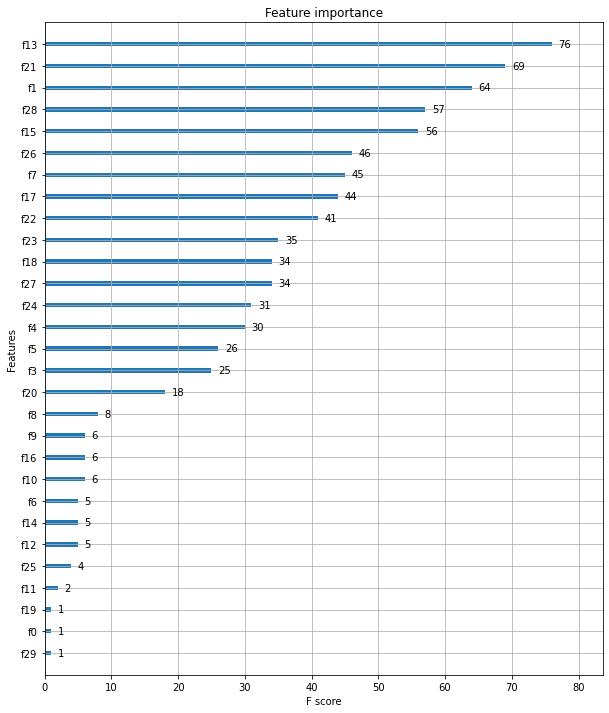

In [23]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,12))
# 사이킷런 Wrapper 클래스를 입력해도 무방
plot_importance(xgb_wrapper, ax=ax)
# 파이썬 래퍼 클래스와 사이킷런 래퍼 클래스에서 결과가 동일 

## 07 LightGBM

- XGBoost와 함께 부스팅 계열 알고리즘에서 가장 각광을 받음.

- XGBoost보다 학습에 걸리는 시간이 훨씬 적고 메모리 사용량도 적음.

- 카테고리형 피처의 자동 변환과 최적 분할(원핫인코딩을 수행하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른 노드 분할 수행

- 적은 데이터(일반적으로 10,000건 이하) 세트에 적용할 경우 과적합이 발생하기 쉬움.

- 균형 트리 분할 방식이 아닌 리프 중심의 트리 분할 방식 사용.


### LightGBM 하이퍼 파라미터

### 주요 파라미터

- num_iterations(default=100): 반복 수행하려는 트리의 개수. LightBGM의 사이킷런 호환 클래스에서는 n_estimators로 이름이 변경됨.

- learning_rate(default=0.1): 0에서 1사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 떄 업데이트되는 학습률값. 

- max_depth (default=-1): 0보다 작은 값을 지정 시, 깊이에 제한이 없음. LightBGM은 Leaf wise 기반이므로 깊이가 상대적으로 더 깊음.

- min_data_in_leaf (default=20): 결정 트리의 min_samples_leaf와 같은 파라미터. LightBGMClassifier에서는 min_child_samples 파라미터로 이름이 변경됨. 최종 결정 클래스인 리프 노드가 되기 위해서 최소한으로 필요한 레코드 수

- num_leaves (default=31): 하나의 트리가 가질 수 있는 최대 리프 개수

- boosting (default=gbdt): 부스팅 트리를 생성하는 알고리즘을 기술

  - gbdt: 일반적인 그래디언트 부스팅 결정 트리

  - rf: 랜덤 포레스트

- bagging_fraction (deault=1.0): 트리가 커져서 과적합되는 것을 제어하기 위해서 데이터를 샘플링하는 비율을 지정. LightBGMClassifier에서는 subsample 파라미터로 이름이 변경됨.

- feature_fraction (default=1.0): 개별 트리를 학습할 떄마다 무작위로 선택하는 피처의 비율. LightBGMClassifier에서는 colsample_bytree 파라미터로 이름이 변경됨.

- lambda_l2 (default=0.0): L2 regulation 제어를 위한 값. 피처 개수가 많을 수록 검토하며 값이 클수록 과적합 감소 효과가 있음. LightBGMClassifier에서는 reg_lmabda 파라미터로 이름이 변경됨.

- lambda_l1 (default=0.0): L1 regulation 제어를 위한 값. L2와 마찬가지로 과적합 제어를 위한 값. LightBGMClassifier에서는 reg_alpha 파라미터로 이름이 변경됨.

### Learning Task 파라미터

- objective: 최솟값을 가져야 할 손실함수를 정의. 애플리케이션 유형 즉, 회귀, 다중 클래스 분류, 이진 분류인지에 따라서 objective인 손실함수가 지정됨.

### 하이퍼 파라미터 튜닝 방안

num_leaves의 개수를 중심으로 min_child_samples (min_data_in_leaf), max_depth를 함께 조정하면서 모델의 복잡도를 줄이는 것이 기본 튜닝 방안

### 파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교

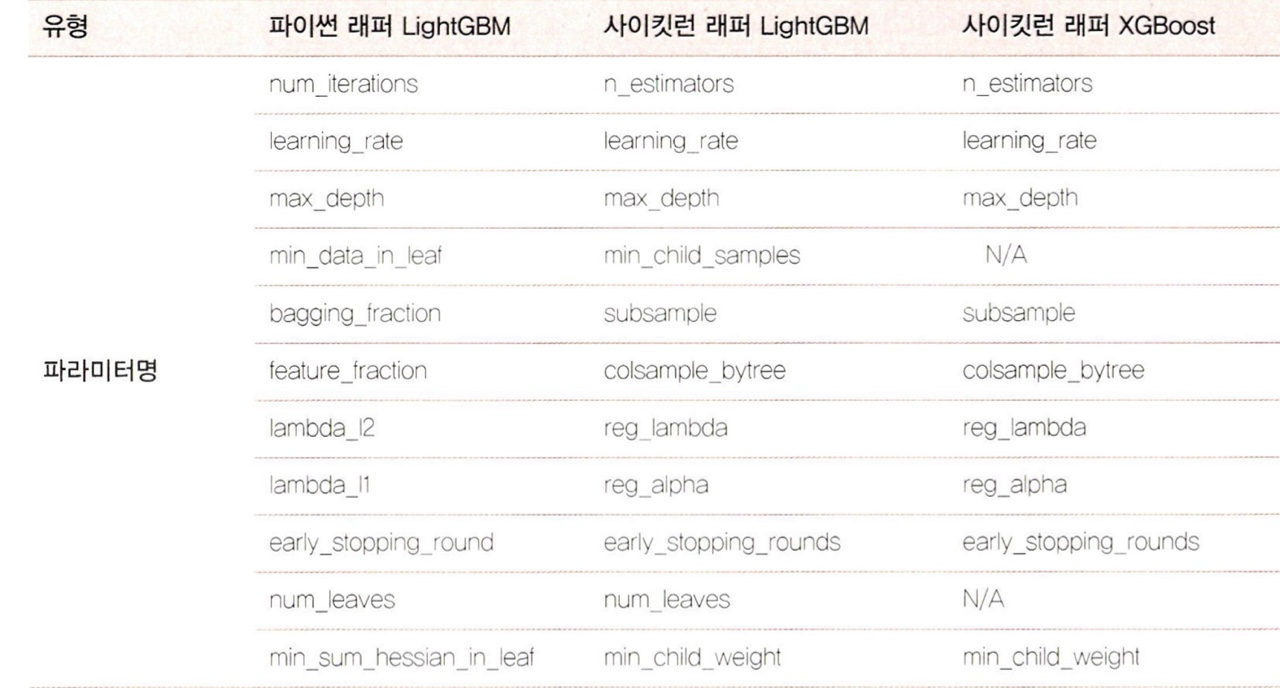


### LightGBM 적용 - 위스콘신 유방암 예측

In [28]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier import
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset=load_breast_cancer()
ftr=dataset.data
target=dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(ftr,target,test_size=0.2, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.565079	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.507451	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355846	valid_0's binary_logloss: 0.355846
[7]	valid_0's binary_logloss: 0.330897	valid_0's binary_logloss: 0.330897
[8]	valid_0's binary_logloss: 0.306923	valid_0's binary_logloss: 0.306923
[9]	valid_0's binary_logloss: 0.28776	valid_0's binary_logloss: 0.28776
[10]	valid_0's binary_logloss: 0.26917	valid_0's binary_logloss: 0.26917
[11]	valid_0's binary_logloss: 0.250954	valid_0's binary_logloss: 0.250954
[12]	valid_0's binary_logloss: 0.23847	valid_0's binary_logloss: 0.23847
[13]	valid_0's binary_logloss: 0.225865	valid_0's bi

In [29]:
get_clf_eval(y_test, preds, pred_proba)

오차행렬
[[33  4]
 [ 2 75]]
정확도 : 0.9474, 정밀도 : 0.9494, 재현율:0.9740, F1 : 0.9615, AUC : 0.9926


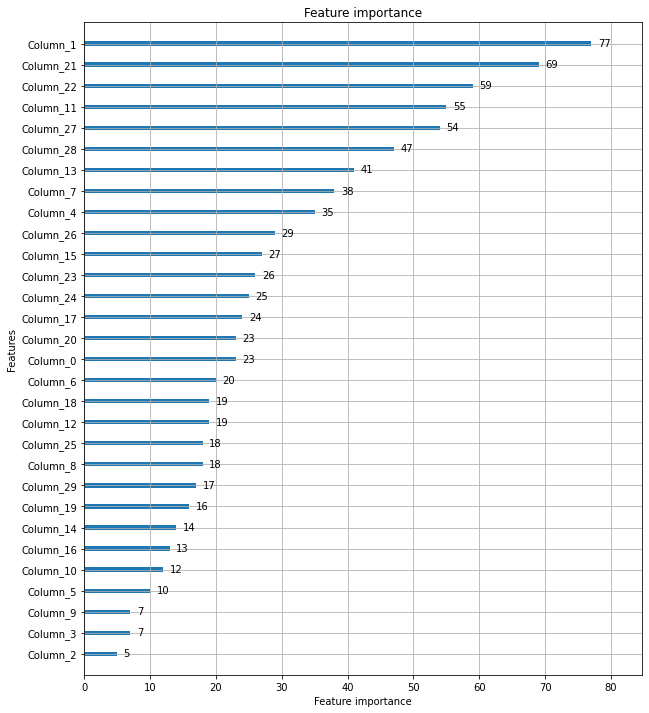

In [31]:
# plot importance()를 이용해 피처 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

## 10 스태킹 앙상블

- 스태킹은 개별적인 여러 알고리즘을 서로 결합해 예측 결과를 도출한다는 점에서 배깅과 부스팅과 공통점을 가지지만, 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행한다는 점에서 차이가 있음. 즉, 개별 알고리즘의 예측 결과 데이터 세츠를 최종적인 메타 데이터 세트로 만들어 별도의 ML 알고리즘으로 최종 학습을 수행하고 테스트 데이터를 기반으로 다시 최종 예측을 수행하는 방식. (메타 모델: 개별 모델의 예측된 데이터 세트를 다시 기반으로 하여 학습하고 예측하는 방식)

- 현실 모델에 적용하는 경우는 많지 않고, 캐글과 같은 대회에서 높은 순위를 차지하기 위해 조금이라도 성능 수치를 높여야 할 경우 자주 사용됨.

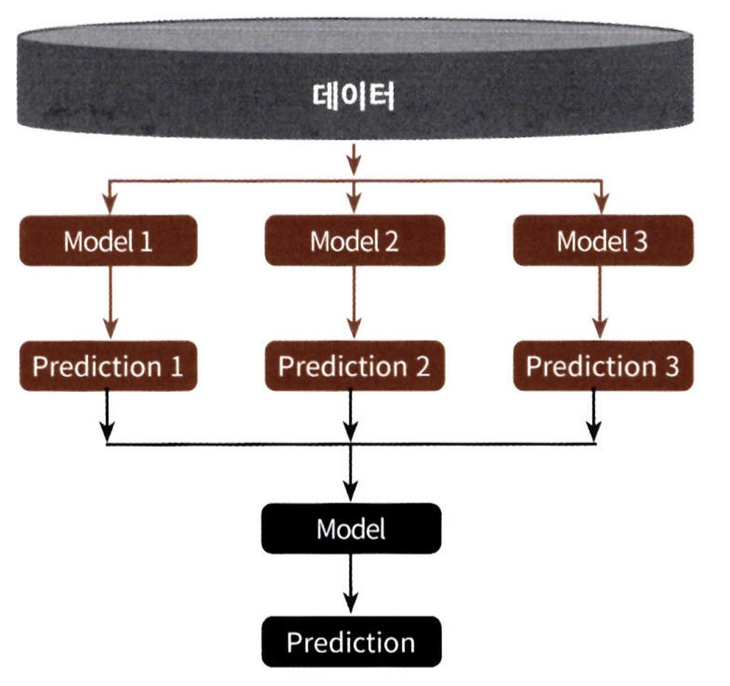




여러 모델의 예측값을 합한 후, 즉 스태킹 형태로 쌓은 뒤 이에 대한 예측을 다시 수행하는 것.

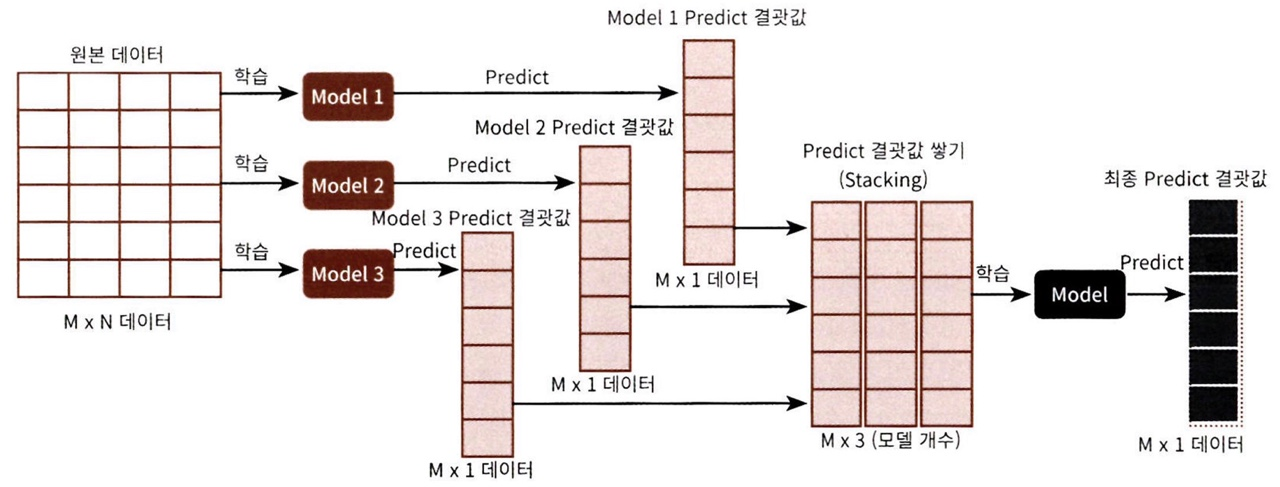

### 기본 스태킹 모델

In [38]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=0)

In [40]:
# 개별 ML 모델 
knn_clf = KNeighborsClassifier(n_neighbors = 4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
lr_final = LogisticRegression(C=10)

# 개별 모델을 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성하고 개별 모델의 정확도 측젇
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9123
에이다부스트 정확도: 0.9561


In [42]:
# 개별 알고리즘으로부터 예측된 예측값을 column level로 옆으로 붙여서 피처 값으로 만들어, 최종 메타 모델인 로지스틱 회귀에서 학습 데이터로 다시 사용
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred]) 
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 칼럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦.
pred = np.transpose(pred)
print(pred.shape)

# 최종 메타 모델인 로지스틱 회귀 학습
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)
print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, final))) 
# 개별 모델 정확도보다 향상됨.

(4, 114)
(114, 4)
최종 메타 모델의 예측 정확도: 0.9737


### CV 세트 기반의 스태킹

마지막 메타 모델 적용 시, 레이블 데이터 세트로 학습 데이터가 아닌 테스트용 레이블 데이터 세트를 기반으로 학습하면 과적합 문제가 발생할 수 있으므로, 이를 개선하기 위해 개별 모델들이 각각 교차 검증으로 메타 모델을 위한 학습용 스태킹 데이터 생성과 에측을 위한 테스트용 스태킹 데이터를 생성한 뒤 이를 기반으로 메타 모델이 학습과 예측을 수행

Step 1. 각 모델별로 원본 학습/테스트 데이터를 예측한 결과 값을 기반으로 메타 모델을 위한 학습용/테스트용 데이터를 생성

Step 2. Step1에서 개별 모델들이 생성한 학습용 데이터를 모두 스태킹 형태로 합쳐서 메타 모델이 학습할 최종 학습용 데이터 세트를 생성함. 마찬가지로, 각 모델들이 생성한 테스트용 데이터를 모두 스태킹 형태로 합쳐서 메타 모델이 학습할 최종 테스트 데이터 세트를 생성함. 메타 모델은 최종적으로 생성된 학습 데이터 세트와 원본 학습 데이터의 레이블 데이터를 기반으로 학습한 뒤, 최종적으로 생성한 테스트 데이터 세트를 예측하고, 원본 테스트 데이터의 레이블 데이터를 기반으로 평가함. 

In [54]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
  # 지정된 n_folds값으로 KFold 생성
  kf = KFold(n_splits=n_folds, shuffle=True, random_state=0)
  # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
  train_fold_pred = np.zeros((X_train_n.shape[0],1))
  test_pred = np.zeros((X_test_n.shape[0],n_folds))
  print(model.__class__.__name__, 'model 시작')

  for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
    # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
    print('\t 폴드 세트: ', folder_counter, '시작')
    X_tr = X_train_n[train_index]
    y_tr = y_train_n[train_index]
    X_te = X_train_n[valid_index]

    # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
    model.fit(X_tr, y_tr)
    # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
    train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
    # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장
    test_pred[:,folder_counter] = model.predict(X_test_n)

  # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

  # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
  return train_fold_pred, test_pred_mean

In [55]:
# 모델별로 get_stacking_base_datasets()함수를 호출해 각 메타 모델이 추후에 사용할 학습용, 테스트용 데이터 세트를 반환
knn_train,knn_test = get_stacking_base_datasets(knn_clf,X_train,y_train,X_test,7)
rf_train,rf_test = get_stacking_base_datasets(rf_clf,X_train,y_train,X_test,7)
dt_train,dt_test = get_stacking_base_datasets(dt_clf,X_train,y_train,X_test,7)
ada_train,ada_test = get_stacking_base_datasets(ada_clf,X_train,y_train,X_test,7)

# 반환된 각 모델 별 학습 데이터와 테스트 데이터를 합치기
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train),axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print("원본 학습 피처 데이터 Shape:",X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:',Stack_final_X_train.shape, '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

KNeighborsClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
RandomForestClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
DecisionTreeClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
AdaBoostClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


In [56]:
# 최종 메타 모델을 스태킹된 학습용 피처 데이터 세트와 원본 학습 레이블 데이터로 학습한 후에 스태킹된 테스트 데이터 세트로 예측
lr_final.fit(Stack_final_X_train,y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print("최종 메타 모델의 예측 정확도: {0:.4f}".format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9737
